<a href="https://colab.research.google.com/github/Braelin2/ECGR5105HW5/blob/main/ECGR5105_HW5_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch as torch
import tensorflow as tf
import torch.optim as optim

In [58]:
# In[2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un  = (t_u - torch.mean(t_u))/torch.std(t_u)


In [34]:
def model(t_u, w2, w1, b):
  return w2 * t_u ** 2 + w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [53]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
     print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params


In [63]:
# SGD Optimizer:
# Learning Rate 0.1
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr = learning_rate)

best_Model = training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720


In [77]:
# SGD Optimizer:
# Learning Rate 0.01
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 2.092286
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090719
Epoch 2000, Loss 2.090719
Epoch 2500, Loss 2.090719
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090719
Epoch 4000, Loss 2.090719
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719


tensor([0.8019, 9.1034, 9.7710], requires_grad=True)

In [76]:
# SGD Optimizer:
# Learning Rate 0.001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 25.740374
Epoch 1000, Loss 8.287434
Epoch 1500, Loss 3.992266
Epoch 2000, Loss 2.734116
Epoch 2500, Loss 2.320184
Epoch 3000, Loss 2.174658
Epoch 3500, Loss 2.121781
Epoch 4000, Loss 2.102272
Epoch 4500, Loss 2.095026
Epoch 5000, Loss 2.092327


tensor([0.8296, 9.1075, 9.7213], requires_grad=True)

In [75]:
# SGD Optimizer:
# Learning Rate 0.0001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 119.458710
Epoch 1000, Loss 95.091667
Epoch 1500, Loss 77.399010
Epoch 2000, Loss 64.135345
Epoch 2500, Loss 53.900246
Epoch 3000, Loss 45.803623
Epoch 3500, Loss 39.266747
Epoch 4000, Loss 33.902706
Epoch 4500, Loss 29.445086
Epoch 5000, Loss 25.704418


tensor([2.9060, 5.9345, 5.0918], requires_grad=True)

In [74]:
# ADAM Optimizer
# Learning Rate 0.1
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719


tensor([0.8019, 9.1033, 9.7710], requires_grad=True)

In [73]:
# ADAM Optimizer
# Learning Rate 0.01
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 37.810387
Epoch 1000, Loss 10.248041
Epoch 1500, Loss 3.446221
Epoch 2000, Loss 2.239089
Epoch 2500, Loss 2.099088
Epoch 3000, Loss 2.090908
Epoch 3500, Loss 2.090721
Epoch 4000, Loss 2.090719
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720


tensor([0.8019, 9.1034, 9.7710], requires_grad=True)

In [72]:
# ADAM Optimizer
# Learning Rate 0.001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-3
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 131.288879
Epoch 1000, Loss 112.093361
Epoch 1500, Loss 95.976517
Epoch 2000, Loss 82.460251
Epoch 2500, Loss 71.117157
Epoch 3000, Loss 61.545887
Epoch 3500, Loss 53.358559
Epoch 4000, Loss 46.194298
Epoch 4500, Loss 39.766365
Epoch 5000, Loss 33.912151


tensor([3.1722, 5.5004, 4.2494], requires_grad=True)

In [71]:
# ADAM Optimizer
# Learning Rate 0.0001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 1e-4
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 151.616013
Epoch 1000, Loss 149.195984
Epoch 1500, Loss 146.813461
Epoch 2000, Loss 144.466370
Epoch 2500, Loss 142.152756
Epoch 3000, Loss 139.871277
Epoch 3500, Loss 137.620499
Epoch 4000, Loss 135.399673
Epoch 4500, Loss 133.207901
Epoch 5000, Loss 131.044891


tensor([1.4863, 1.4962, 0.4931], requires_grad=True)

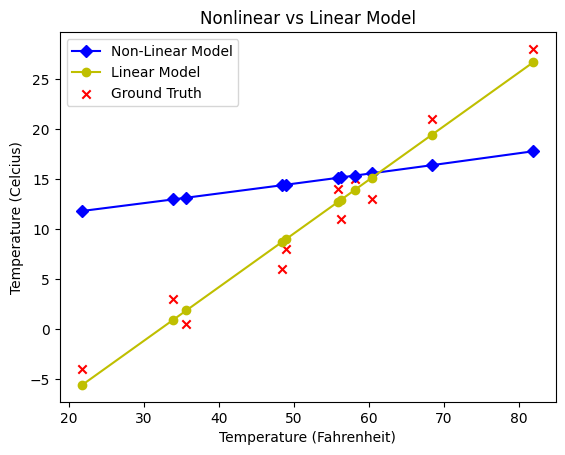

In [70]:
Complete_Model = model(0.01*t_u, *best_Model)
given_Model = (5.3671 * (t_u*0.1) - 17.3012)

t_u_final, num = torch.sort(t_u)
final_Model, num = torch.sort(Complete_Model)
given_final_Model, num = torch.sort(given_Model)

plt.plot(t_u_final.detach().numpy(), final_Model.detach().numpy(), label = "Non-Linear Model", c = "b", marker = "D")
plt.plot(t_u_final.detach().numpy(), given_final_Model.detach().numpy(), label = "Linear Model", c = 'y', marker = "o")
plt.scatter(t_u.detach().numpy(), t_c.detach().numpy(), label = "Ground Truth", c = 'r', marker = 'x')
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celcius)")
plt.legend()
plt.title("Nonlinear vs Linear Model")
plt.show()